In [1]:
import pandas as pd
import glob
import os
path=r"D:\Terror"
os.chdir(path)
#os.listdir(path)

['gtd1993_748.csv',
 'gtd_12to15_52134.csv',
 'gtd_70to91_49566.csv',
 'gtd_92to11_no 93_55072.csv']

In [2]:
all_files=glob.glob(path+'/*.csv')
print(all_files)

['D:\\Terror\\gtd1993_748.csv', 'D:\\Terror\\gtd_12to15_52134.csv', 'D:\\Terror\\gtd_70to91_49566.csv', 'D:\\Terror\\gtd_92to11_no 93_55072.csv']


In [11]:
df =[]

for all in all_files:
    df.append(pd.read_csv(all,encoding='latin',low_memory=False))#ISO-8859-1
big_data = pd.concat(df,ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [85]:
big_data.head()

,INT_ANY,INT_IDEO,INT_LOG,INT_MISC,addnotes,alternative,alternative_txt,approxdate,attacktype1,attacktype1_txt,...,weapsubtype4,weapsubtype4_txt,weaptype1,weaptype1_txt,weaptype2,weaptype2_txt,weaptype3,weaptype3_txt,weaptype4,weaptype4_txt
0,NaN,NaN,NaN,NaN,The Red Hand Commandos are a Northern Irish Lo...,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
1,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
2,NaN,NaN,NaN,NaN,The soldiers represented the first victims of ...,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
3,NaN,NaN,NaN,NaN,Haim Nahmani had arranged to meet a HAMAS info...,NaN,.,NaN,2,Armed Assault,...,NaN,.,9,Melee,9.0,Melee,NaN,.,NaN,.
4,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.


# 3) Are some countries better at defending themselves against terrorist attacks? If yes, which is the safest country to live

In [126]:
safe=big_data[['country_txt','nkill','nwound','success','eventid']]
safe.head()

,country_txt,nkill,nwound,success,eventid
0,Northern Ireland,0.0,2.0,1.0,199301010001
1,Egypt,0.0,0.0,1.0,199301010002
2,Sri Lanka,2.0,0.0,1.0,199301030001
3,Israel,1.0,0.0,1.0,199301030002
4,Israel,0.0,0.0,1.0,199301030003


In [127]:
safe['Total']=safe['nkill']+safe['nwound']
safe.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country_txt,nkill,nwound,success,eventid,Total
0,Northern Ireland,0.0,2.0,1.0,199301010001,2.0
1,Egypt,0.0,0.0,1.0,199301010002,0.0
2,Sri Lanka,2.0,0.0,1.0,199301030001,2.0
3,Israel,1.0,0.0,1.0,199301030002,1.0
4,Israel,0.0,0.0,1.0,199301030003,0.0


In [128]:
safe['Total']=safe['Total'].fillna(0)
safe.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,country_txt,nkill,nwound,success,eventid,Total
0,Northern Ireland,0.0,2.0,1.0,199301010001,2.0
1,Egypt,0.0,0.0,1.0,199301010002,0.0
2,Sri Lanka,2.0,0.0,1.0,199301030001,2.0
3,Israel,1.0,0.0,1.0,199301030002,1.0
4,Israel,0.0,0.0,1.0,199301030003,0.0


In [129]:
safe_1=safe.groupby(['country_txt'])['Total'].count().reset_index()
safe_1.head()

,country_txt,Total
0,Afghanistan,9693
1,Albania,77
2,Algeria,2743
3,Andorra,1
4,Angola,495


In [130]:
safe_2=safe[(safe['success']==0)  & (safe['Total']==0)]
safe_2.head()

,country_txt,nkill,nwound,success,eventid,Total
44,United States,0.0,0.0,0.0,199301180001,0.0
53,India,0.0,0.0,0.0,199301220005,0.0
84,Northern Ireland,0.0,0.0,0.0,199302140001,0.0
96,Croatia,0.0,0.0,0.0,199302260004,0.0
109,Japan,0.0,0.0,0.0,199303050002,0.0


In [131]:
safe_3=safe_2.groupby(['country_txt'])['Total'].count().reset_index()
safe_3.head()

,country_txt,Total
0,Afghanistan,479
1,Albania,12
2,Algeria,108
3,Angola,7
4,Argentina,64


In [132]:
tot_safe=pd.merge(safe_1,safe_3, on='country_txt',how='inner') 
tot_safe.head()

,country_txt,Total_x,Total_y
0,Afghanistan,9693,479
1,Albania,77,12
2,Algeria,2743,108
3,Angola,495,7
4,Argentina,805,64


In [137]:
tot_safe['Defend_Percent']= tot_safe['Total_y']/tot_safe['Total_x']*100
tot_safe_final=tot_safe.sort_values(by='Defend_Percent',ascending=False)
tot_safe_final.head()




,country_txt,Total_x,Total_y,Defend_Percent
67,Ireland,274,142,51.824818
103,New Zealand,18,9,50.000000
93,Mauritius,2,1,50.000000
159,Vietnam,10,4,40.000000
36,Dominica,3,1,33.333333


In [138]:
tot_safe_final=tot_safe_final.rename(columns={'Total_x':'Terror_Attack','Total_y':'Succesfully Defended'})
tot_safe_final.head()

,country_txt,Terror_Attack,Succesfully Defended,Defend_Percent
67,Ireland,274,142,51.824818
103,New Zealand,18,9,50.000000
93,Mauritius,2,1,50.000000
159,Vietnam,10,4,40.000000
36,Dominica,3,1,33.333333


*END OF PS:3*

# 5) Terrorist attack in India and Pakistan in last 45 years

In [63]:
india=big_data[(big_data['country_txt']=='India')] 
india.head()

,INT_ANY,INT_IDEO,INT_LOG,INT_MISC,addnotes,alternative,alternative_txt,approxdate,attacktype1,attacktype1_txt,...,weapsubtype4,weapsubtype4_txt,weaptype1,weaptype1_txt,weaptype2,weaptype2_txt,weaptype3,weaptype3_txt,weaptype4,weaptype4_txt
53,NaN,NaN,NaN,NaN,NaN,2.0,Other Crime Type,NaN,4,Hijacking,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.
63,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.
70,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,6,Hostage Taking (Kidnapping),...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
123,NaN,NaN,NaN,NaN,This was one of sixteen related attacks (cf. 1...,NaN,.,NaN,7,Facility/Infrastructure Attack,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.
124,NaN,NaN,NaN,NaN,This was one of sixteen related attacks (cf. 1...,NaN,.,NaN,7,Facility/Infrastructure Attack,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.


In [14]:
list(india)

['INT_ANY',
 'INT_IDEO',
 'INT_LOG',
 'INT_MISC',
 'addnotes',
 'alternative',
 'alternative_txt',
 'approxdate',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'city',
 'claim2',
 'claim3',
 'claimed',
 'claimmode',
 'claimmode2',
 'claimmode2_txt',
 'claimmode3',
 'claimmode3_txt',
 'claimmode_txt',
 'compclaim',
 'corp1',
 'corp2',
 'corp3',
 'country',
 'country_txt',
 'crit1',
 'crit2',
 'crit3',
 'dbsource',
 'divert',
 'doubtterr',
 'eventid',
 'extended',
 'gname',
 'gname2',
 'gname3',
 'gsubname',
 'gsubname2',
 'gsubname3',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'hostkidoutcome',
 'hostkidoutcome_txt',
 'iday',
 'imonth',
 'ingroup',
 'ingroup2',
 'ingroup3',
 'ishostkid',
 'iyear',
 'kidhijcountry',
 'latitude',
 'location',
 'longitude',
 'motive',
 'multiple',
 'natlty1',
 'natlty1_txt',
 'natlty2',
 'natlty2_txt',
 'natlty3',
 'natlty3_txt',
 'ndays',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'nkill',


In [16]:
india_1=india[['eventid','iyear','country_txt']]
india_1.head()

,eventid,iyear,country_txt
53,199301220005,1993,India
63,199301260001,1993,India
70,199301300003,1993,India
123,199303120002,1993,India
124,199303120003,1993,India


In [26]:
india_2=india_1.groupby('iyear')['country_txt'].count().reset_index()

india_2.head()

,iyear,country_txt
0,1972,1
1,1975,1
2,1976,1
3,1977,1
4,1979,20


In [17]:
pak_1=pak[['eventid','iyear','country_txt']]
pak_1.head()

,eventid,iyear,country_txt
50,199301220001,1993,Pakistan
143,199303140002,1993,Pakistan
232,199305010002,1993,Pakistan
395,199308030001,1993,Pakistan
396,199308030002,1993,Pakistan


In [25]:
pak_2=pak_1.groupby('iyear')['country_txt'].count().reset_index()
pak_2.head()

,iyear,country_txt
0,1970,1
1,1974,2
2,1975,2
3,1976,3
4,1978,2


In [59]:
indpak=pd.merge(pak_2, india_2, on='iyear', how='outer')
indpak=indpak.sort_values(by='iyear',ascending=True)
indpak_1=indpak.fillna(0)


indpak_1=indpak_1.rename(columns={'country_txt_x':'Pakistan','country_txt_y':'India','iyear':'Year'})
indpak_1.head()

,Year,Pakistan,India
0,1970,1.0,0.0
42,1972,0.0,1.0
1,1974,2.0,0.0
2,1975,2.0,1.0
3,1976,3.0,1.0


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

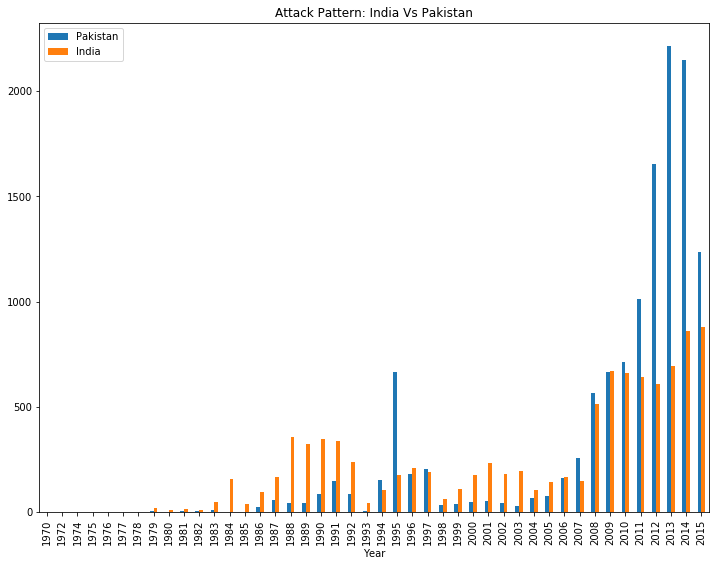

In [62]:
plt.rcParams["figure.figsize"]=12,9
indpak_1.plot(kind='bar',x='Year')
#plt.xlabel('Trend')
#plt.ylabel('Attack Pattern')
plt.title('Attack Pattern: India Vs Pakistan')
plt.show()

*END OF PS: 5*

# 4) Terror attack pattern in United States vs Russian Federation/USSR in last 45 years

In [65]:
russia=big_data[(big_data['country_txt']=='Russia')] 
russia.head()

,INT_ANY,INT_IDEO,INT_LOG,INT_MISC,addnotes,alternative,alternative_txt,approxdate,attacktype1,attacktype1_txt,...,weapsubtype4,weapsubtype4_txt,weaptype1,weaptype1_txt,weaptype2,weaptype2_txt,weaptype3,weaptype3_txt,weaptype4,weaptype4_txt
393,NaN,NaN,NaN,NaN,NaN,1.0,Insurgency/Guerilla Action,NaN,1,Assassination,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
411,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
506,NaN,NaN,NaN,NaN,NaN,NaN,.,NaN,7,Facility/Infrastructure Attack,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.
732,NaN,NaN,NaN,NaN,Russian news agencies police recovered the $ 1...,2.0,Other Crime Type,NaN,6,Hostage Taking (Kidnapping),...,NaN,.,5,Firearms,6.0,Explosives/Bombs/Dynamite,NaN,.,NaN,.
822,-9.0,-9.0,-9.0,0.0,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.


In [66]:
list(russia)

['INT_ANY',
 'INT_IDEO',
 'INT_LOG',
 'INT_MISC',
 'addnotes',
 'alternative',
 'alternative_txt',
 'approxdate',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'city',
 'claim2',
 'claim3',
 'claimed',
 'claimmode',
 'claimmode2',
 'claimmode2_txt',
 'claimmode3',
 'claimmode3_txt',
 'claimmode_txt',
 'compclaim',
 'corp1',
 'corp2',
 'corp3',
 'country',
 'country_txt',
 'crit1',
 'crit2',
 'crit3',
 'dbsource',
 'divert',
 'doubtterr',
 'eventid',
 'extended',
 'gname',
 'gname2',
 'gname3',
 'gsubname',
 'gsubname2',
 'gsubname3',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'hostkidoutcome',
 'hostkidoutcome_txt',
 'iday',
 'imonth',
 'ingroup',
 'ingroup2',
 'ingroup3',
 'ishostkid',
 'iyear',
 'kidhijcountry',
 'latitude',
 'location',
 'longitude',
 'motive',
 'multiple',
 'natlty1',
 'natlty1_txt',
 'natlty2',
 'natlty2_txt',
 'natlty3',
 'natlty3_txt',
 'ndays',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'nkill',


In [67]:
russia_1=russia[['eventid','iyear','country_txt']]
russia_1.head()

,eventid,iyear,country_txt
393,199308010002,1993,Russia
411,199308080002,1993,Russia
506,199309130008,1993,Russia
732,199312230001,1993,Russia
822,201201030043,2012,Russia


In [68]:
russia_2=russia_1.groupby('iyear')['country_txt'].count().reset_index()

russia_2.head()

,iyear,country_txt
0,1992,21
1,1993,4
2,1994,47
3,1995,37
4,1996,66


In [70]:
ussr=big_data[(big_data['country_txt']=='Soviet Union')] 
ussr.head()

,INT_ANY,INT_IDEO,INT_LOG,INT_MISC,addnotes,alternative,alternative_txt,approxdate,attacktype1,attacktype1_txt,...,weapsubtype4,weapsubtype4_txt,weaptype1,weaptype1_txt,weaptype2,weaptype2_txt,weaptype3,weaptype3_txt,weaptype4,weaptype4_txt
58574,1.0,1.0,1.0,0.0,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.
90824,-9.0,-9.0,-9.0,0.0,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.
90825,-9.0,-9.0,-9.0,0.0,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.
91811,-9.0,-9.0,-9.0,0.0,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.
91812,-9.0,-9.0,-9.0,0.0,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.


In [71]:
ussr_1=ussr[['eventid','iyear','country_txt']]
ussr_1.head()

,eventid,iyear,country_txt
58574,197801080003,1978,Soviet Union
90824,198904200003,1989,Soviet Union
90825,198904200004,1989,Soviet Union
91811,198907260003,1989,Soviet Union
91812,198907260004,1989,Soviet Union


In [75]:
ussr_2=ussr_1.groupby('iyear')['country_txt'].count().reset_index()

ussr_2.head()

,iyear,country_txt
0,1978,1
1,1989,7
2,1990,36
3,1991,34


In [76]:
union=russia_2.append(ussr_2)
union=union.sort_values(by='iyear',ascending =True)
union.head()

,iyear,country_txt
0,1978,1
1,1989,7
2,1990,36
3,1991,34
0,1992,21


In [77]:
US=big_data[(big_data['country_txt']=='United States')] 
US.head()

,INT_ANY,INT_IDEO,INT_LOG,INT_MISC,addnotes,alternative,alternative_txt,approxdate,attacktype1,attacktype1_txt,...,weapsubtype4,weapsubtype4_txt,weaptype1,weaptype1_txt,weaptype2,weaptype2_txt,weaptype3,weaptype3_txt,weaptype4,weaptype4_txt
43,NaN,NaN,NaN,NaN,"Two days later, there was a fire was set at th...",NaN,.,NaN,7,Facility/Infrastructure Attack,...,NaN,.,8,Incendiary,NaN,.,NaN,.,NaN,.
44,NaN,NaN,NaN,NaN,"A month earlier, Christopher David Fisher fire...",NaN,.,NaN,7,Facility/Infrastructure Attack,...,NaN,.,8,Incendiary,NaN,.,NaN,.,NaN,.
47,NaN,NaN,NaN,NaN,"Two days earlier, there were three Molotov coc...",2.0,Other Crime Type,NaN,7,Facility/Infrastructure Attack,...,NaN,.,8,Incendiary,NaN,.,NaN,.,NaN,.
62,NaN,NaN,NaN,NaN,"On June 17, 1997, Mir Amal Kansi confessed to ...",2.0,Other Crime Type,NaN,2,Armed Assault,...,NaN,.,5,Firearms,NaN,.,NaN,.,NaN,.
79,NaN,NaN,NaN,NaN,The fire was ignited around 12:40 AM and was e...,NaN,.,NaN,7,Facility/Infrastructure Attack,...,NaN,.,8,Incendiary,NaN,.,NaN,.,NaN,.


In [78]:
US_1=US[['eventid','iyear','country_txt']]
US_1.head()

,eventid,iyear,country_txt
43,199301170009,1993,United States
44,199301180001,1993,United States
47,199301190004,1993,United States
62,199301250002,1993,United States
79,199302040003,1993,United States


In [79]:
US_2=US_1.groupby('iyear')['country_txt'].count().reset_index()

US_2.head()

,iyear,country_txt
0,1970,468
1,1971,247
2,1972,64
3,1973,58
4,1974,94


In [83]:
union_1=pd.merge(US_2,union,on='iyear',how='outer')
union_2=union_1.sort_values(by='iyear',ascending=True)
union_3=union_2.fillna(0)


union_3=union_3.rename(columns={'country_txt_x':'United States','country_txt_y':'Russia/USSR','iyear':'Year'})
union_3.head()

,Year,United States,Russia/USSR
0,1970,468,0.0
1,1971,247,0.0
2,1972,64,0.0
3,1973,58,0.0
4,1974,94,0.0


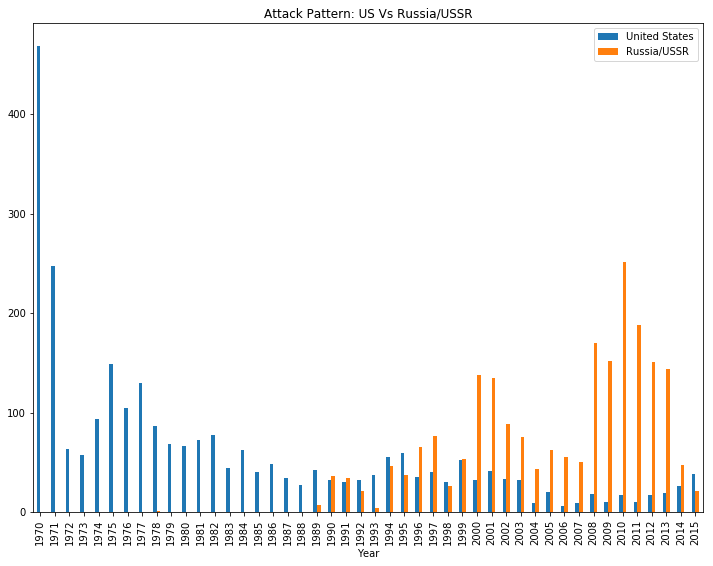

In [84]:
plt.rcParams["figure.figsize"]=12,9
union_3.plot(kind='bar',x='Year')

plt.title('Attack Pattern: US Vs Russia/USSR')
plt.show()

*END OF PS: 4*

--------------------------------END OF FILE---------------------------------------